In [1]:
import numpy as np 
import pandas as pd
import urllib 
import scipy.optimize 
import random
import gzip
import ast
import csv
import gzip
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy

In [2]:
import warnings
warnings.filterwarnings("ignore")

with gzip.open("assignment1.tar.gz", "rb") as f:
    file_content=f.read()

import tarfile
tar=tarfile.open("assignment1.tar.gz")
tar.extractall()

for member in tar.getmembers():
    print("Extracting %s" % member.name)
    tar.extract(member)

import gzip
from collections import defaultdict
path = "train_Interactions.csv.gz"

def readGz(path):
    for l in gzip.open(path, 'rt'):
        yield eval(l)

def readCSV(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        yield l.strip().split(',')

1. Although we have built a validation set, it only consists of positive samples. For this task we also need
examples of user/item pairs that weren’t read. For each entry (user,book) in the validation set, sample a
negative entry by randomly choosing a book that user hasn’t read.1 Evaluate the performance (accuracy)
of the baseline model on the validation set you have built (1 mark).

In [3]:
X = []
y = []
df = pd.read_csv('train_Interactions.csv')
for i in range(len(df)):
    X.extend([[df['userID'][i], df['bookID'][i], df['rating'][i]]])
    y.append(1)

In [4]:
Xy=list(zip(X,y))

In [5]:
random.shuffle(Xy)

In [6]:
X_train = X[0:190000]
y_train = y[0:190000]
X_val = X[190000:200000]
y_val = y[190000:200000]

In [7]:
len(X_val)

10000

In [8]:
X_val[-1]

['u93625722', 'b90140601', 4]

In [9]:
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)
all_books = set([x[1] for x in X])


For each (user, book) in the train set, randomly choose a book from the entire dataset. If the random book is not in booksPerUser[user], add that (user, random_book) pair to the train set. 

In [10]:
X_train2=[]

for user_book in X_train:
    current_user = user_book[0]
    #rating=-1
    rating=0
    the_diff=list(all_books.difference(itemsPerUser[current_user]))
    rand_idx = random.randrange(len(the_diff)) 
    choice = the_diff[rand_idx]
    X_train2.append([current_user, choice,rating])
    y_train.append(0)

In [11]:
X_train.extend(X_train2)

In [12]:
valid = []

(2) For each (user, book) in the validation set, randomly choose a book from the entire dataset. If the random book is not in booksPerUser[user], add that (user, random_book) pair to the validation set. 

In [13]:
X_val2=[]

for user_book in X_val:
    current_user = user_book[0]
    #rating=-1
    rating=0
    the_diff=list(all_books.difference(itemsPerUser[current_user]))
    rand_idx = random.randrange(len(the_diff)) 
    choice = the_diff[rand_idx]
    X_val2.append([current_user, choice,rating])
    y_val.append(0)

In [14]:
X_val.extend(X_val2)

(3) I use the provided baseline code to compute the baseline's predictions on the training set. 
This returns a set of the most popular 50% of books based on the training set. 

In [15]:
bookCount = defaultdict(int)
totalRead = 0

for user,book,rating in X_train: #running baseline code on the training set I created for read prediction.
    bookCount[book] += 1
    totalRead += 1

mostPopular = [(bookCount[x], x) for x in bookCount]
mostPopular.sort()
mostPopular.reverse()

return1 = set()
count = 0
for ic, i in mostPopular:
    count += ic
    return1.add(i)
    if count > totalRead/2: break

(4) For each (user, book) in the new balanced validation set, I compute the model's prediction using the previous set (which was trained on only the training set). 

In [16]:
Y_val_predictions=[]

for l in range(len(X_val)):
    u=X_val[l][0]
    b=X_val[l][1]
    if b in return1:
        Y_val_predictions.append(1)
    else:
        Y_val_predictions.append(0)

In [17]:
Y_val_actual=[]

for l in range(len(X_val)):
    #continue 
    u=X_val[l][0]
    b=X_val[l][1]
    rating=X_val[l][2]
    
    if rating == 0:
        Y_val_actual.append(0) #code this as the book was not read
    else:
        Y_val_actual.append(1) #code this as the book was read

In [43]:
len(Y_val_actual)

20000

In [18]:
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = confusion_matrix(Y_val_actual,Y_val_predictions).ravel()
accuracy=(tp+tn)/(tp+tn+fp+fn)
TNR=tn/(tn+fp)
TPR=tp/(tp+fn)
BER=1-0.5*(TPR+TNR)
recall=tp/(tp+fn)
precision=tp/(tp+fp)
F1=2*(precision*recall)/(precision+recall)
F10=101*(precision*recall)/(100*precision+recall)

print("Accuracy of baseline classifier on the validation set is:",accuracy)
print("BER is:",BER)
print("F1 is:",F1)
print("F10 is:",F10)

Accuracy of baseline classifier on the validation set is: 0.64075
BER is: 0.3598249957897621
F1 is: 0.6251760655224582
F10 is: 0.6273252909140288


### Question 2:
Try other thresholds or percentiles for popularity, to come up with better accuracy on the validation set.

In [19]:
threshold=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 
accuracy_per_threshold=[]

In [20]:
for tr in threshold:
    print(tr)
    bookCount2= defaultdict(int)
    totalRead2 = 0

    for i in range(len(X_train)):
        user2=X_train[i][0]
        book2=X_train[i][1]
        bookCount2[book2] += 1
        totalRead2 += 1
    
    mostPopular2 = [(bookCount2[x], x) for x in bookCount2]
    mostPopular2.sort()
    mostPopular2.reverse()
    
    return2 = set()
    count2 = 0
    for ic, i in mostPopular:
        count2 += ic
        return2.add(i)
        if count2 > totalRead2*tr: break
    
    Y_val_predictions2=[]
    
    for l in range(len(X_val)):
    #continue 
        u=X_val[l][0]
        b=X_val[l][1]
        if b in return2:
            Y_val_predictions2.append(1)
        else:
            Y_val_predictions2.append(0)
            
    tn2,fp2,fn2,tp2 = confusion_matrix(Y_val_actual,Y_val_predictions2).ravel()
    accuracy2=(tp2+tn2)/(tp2+tn2+fp2+fn2)
    print(accuracy2)
    accuracy_per_threshold.append(accuracy2)


0.1
0.58185
0.2
0.6212
0.3
0.643
0.4
0.65025
0.5
0.64075
0.6
0.6216
0.7
0.59565
0.8
0.5654
0.9
0.52635


Graph accuracy for different Thresholds:

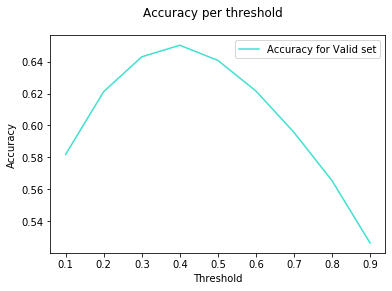

In [21]:
plt.plot(threshold,accuracy_per_threshold, color="turquoise",label="Accuracy for Valid set")
plt.suptitle("Accuracy per threshold")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on the graph, we can conclude that a threshold of 0.4 rather than 0.5 will increase the accuracy of the baseline model on the validation set. If we print the accuracy with further threshold we find that 0.589 has the highest accuracy.

In [22]:
X_train_df=pd.DataFrame(X_train, columns = ['userID' , 'bookID', 'rating']) 

In [23]:
X_train_df.head()

,userID,bookID,rating
0,u79354815,b14275065,4
1,u56917948,b82152306,5
2,u97915914,b44882292,5
3,u49688858,b79927466,5
4,u08384938,b05683889,2


In [24]:
X_val_df=pd.DataFrame(X_val, columns = ['userID' , 'bookID', 'rating'])

In [25]:
len(X_val_df)

20000

In [26]:
threshold=[0.4] #this is the threshold we select for the highest accuracy.

In [27]:
#Build Popularity Feature:
for tr in threshold:
    print(tr)
    bookCount2= defaultdict(int)
    totalRead2 = 0

    for i in range(len(X_train_df)):
        user2=X_train_df.iloc[i][0]
        book2=X_train_df.iloc[i][1]
        bookCount2[book2] += 1
        totalRead2 += 1
    
    mostPopular2 = [(bookCount2[x], x) for x in bookCount2]
    mostPopular2.sort()
    mostPopular2.reverse()
    
    return2 = set()
    count2 = 0
    for ic, i in mostPopular:
        count2 += ic
        return2.add(i)
        if count2 > totalRead2*tr: break
    
    Y_predictions_pop=[]
    
    for l in range(len(X_val_df)): 
        u=X_val_df.iloc[l][0]
        b=X_val_df.iloc[l][1]
        if b in return2:
            Y_predictions_pop.append(1)
        else:
            Y_predictions_pop.append(0)
            
    tn2,fp2,fn2,tp2 = confusion_matrix(Y_val_actual,Y_predictions_pop).ravel()
    accuracy2=(tp2+tn2)/(tp2+tn2+fp2+fn2)
    print(accuracy2)
    accuracy_per_threshold.append(accuracy2)


0.4
0.65025


***3.*** A stronger baseline than the one provided might make use of the Jaccard similarity (or another similarity metric). Given a pair (u, b) in the validation set, consider all training items b' that user u has read. For each, compute the Jaccard similarity between b and b', i.e., users (in the training set) who have read b and users who have read b'. Predict as ‘read’ if the maximum of these Jaccard similarities exceeds a threshold (you may choose the threshold that works best). Report the performance on your validation set (1 mark).

In [32]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    return numer / denom

In [33]:
# WHAT I DID IN HMW 3
# Obtain all available books in the train set:
allBooks_train = X_train_df['bookID'].unique().tolist()
# Get Books per user on the train set:
book_user_train = X_train_df.groupby('userID')
#Users per book on the train set
user_per_book_train = X_train_df.groupby('bookID')

y_predictions_jaccard = []
similar = []
threshold = 0.00001

In [34]:
for i in range(len(X_val_df)):
    user = X_val_df.iloc[i][0]
    BK = X_val_df.iloc[i][1]
    
    sim = []
    if BK in allBooks_train:
        BK_users = set(user_per_book_train.get_group(BK)['userID'])
        Book_read = book_user_train.get_group(user)['bookID']
             
        if len(BK_users) == 1:
            users_book_read = {}
            sim.append(Jaccard(BK_users,users_book_read))
            if max(sim) > threshold:
                y_predictions_jaccard.append(1)
            else:
                y_predictions_jaccard.append(0)      
        else:
            for i in Book_read:
                users_book_read = set(user_per_book_train.get_group(i)['userID'])
                sim.append(Jaccard(BK_users,users_book_read))
                
            if max(sim) > threshold:
                y_predictions_jaccard.append(1)
            else:
                y_predictions_jaccard.append(0)
    else: 
        sim = 0
        y_predictions_jaccard.append(0)
    
    similar.append(sim)

In [36]:
len(y_predictions_jaccard)

20000

In [37]:
tn4,fp4,fn4,tp4= confusion_matrix(Y_val_actual,y_predictions_jaccard).ravel()
accuracy4=(tp4+tn4)/(tp4+tn4+fp4+fn4)
#the accuracy is: 
accuracy4 #0.5928

0.4788

Instead of combining the model as I did in homework #3, I decided to use ensembling. I build a feature vector using our predictions from the popularity predictions (using a threshold of 0.4) as well as the jaccard predictions (using a threshold of 0.00001). I then run a logistic regression on both features to fit the model.

In [38]:
features = np.column_stack((Y_predictions_pop, y_predictions_jaccard))

In [42]:
len(y_predictions_jaccard)

20000

In [44]:
y=Y_val_actual

In [53]:
from sklearn import linear_model

In [83]:
mod = linear_model.LogisticRegression(C=0.0001, class_weight='balanced')

In [84]:
mod.fit(features, y)

LogisticRegression(C=0.0001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
#make predictions from the data
predictions = mod.predict(features)

In [86]:
#Check whether they match the labels
correctPredictions = predictions == y
correctPredictions

array([ True, False, False, ...,  True,  True, False])

In [87]:
print('Accuracy for regression is = ')
sum(predictions == y) / len(predictions)

Accuracy for regression is = 


0.65025

In [81]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [82]:
#used to calculate C value above:

lr = linear_model.LogisticRegression()
parameters = {'C':[0.0001,0.001,.01,0.1,1,10,100,1000]}
clf = GridSearchCV(lr, parameters, cv=5) #run 5 different experiment on 5 parameters
model_grid= clf.fit(features, y)
print('What is the best model:', clf.best_estimator_)  
print('What is the score of the best model:',clf.best_score_) 
results_grid = pd.DataFrame(clf.cv_results_)
print(results_grid)

What is the best model: LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
What is the score of the best model: 0.65025
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.026480      0.002532         0.003636        0.001391  0.0001   
1       0.022378      0.000031         0.002651        0.000087   0.001   
2       0.024041      0.000980         0.002610        0.000044    0.01   
3       0.024641      0.000248         0.002580        0.000018     0.1   
4       0.024645      0.000155         0.002614        0.000026       1   
5       0.025426      0.000938         0.002634        0.000042      10   
6       0.027855      0.006695         0.002992        0.000723     100   
7  

In [ ]:
mod.fit(features, y)
predict_test=mod.predict(X_test)

In [ ]:
book = []
users = []
X5 = []
y5 = []
df5 = pd.read_csv('pairs_Read.txt', sep ="-" )
df5.rename(columns = {'bookID,prediction':'bookID'}, inplace = True)

In [ ]:
for i, l in enumerate(open('pairs_Read.txt')):
    if l.startswith("userID"):
        with open('Read_predictions_assignment1.csv', 'w') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(["userID-bookID","prediction"])
        continue
  u,b = l.strip().split('-')
  if b in not in books:
    predictions.write(u + '-' + b + ",1\n")
  else:
    predictions.write(u + '-' + b + ",0\n")

predictions.close()

In [ ]:
predictions = open("predictions_Read.txt", 'w')
for i in range(len(df5)):
    user = df5.iloc[i][0]
    BK = df5.iloc[i][1]
    if BK in return4:
        sim = []
        if BK in allBooks_train:
            BK_users = set(user_per_book_train.get_group(BK)['userID'])
            Book_read = book_user_train.get_group(user)['bookID']
        if len(BK_users) == 1:
            users_book_read = {}
            sim.append(Jaccard(BK_users,users_book_read))
            if max(sim) > threshold4:
                predictions.write(user + '-' + BK + ",1\n")
            else:
                predictions.write(user + '-' + BK + ",0\n") 
        else:
            # Look for users (in the train set) who have read BK and users who have read Book_read
            for i in Book_read:
                users_book_read = set(user_per_book_train.get_group(i)['userID'])
                sim.append(Jaccard(BK_users,users_book_read))
            
            if max(sim) > threshold4:
                predictions.write(user + '-' + BK + ",1\n")
            else:
                predictions.write(user + '-' + BK + ",0\n")
    else: 
            sim = 0
            predictions.write(user + '-' + BK + ",0\n")

predictions.close()

***4.*** Improve the above predictor by incorporating both a Jaccard-based threshold and a popularity based
threshold. Report the performance on your validation set (1 mark). 

In [ ]:
Threshold=[0.4] # this is the most effective Threshold from above, but we find later that using 0.6 gives a better performance on kaggle.
Y_val_predictions4=[]
similar4 = []
threshold4 = 0.000001
sim=[]

Logic for algorithm: Using Jaccard and Popular Method
if popular book> 50% and  if sim>0.1,
then append 1, else append 0.

In [ ]:
for tr in Threshold:
    print(tr)
    bookCount4= defaultdict(int)
    totalRead4 = 0

    for i in range(len(X_train)):
            user4=X_train[i][0]
            book4=X_train[i][1]
            bookCount4[book4] += 1
            totalRead4 += 1
    
    mostPopular4 = [(bookCount4[x], x) for x in bookCount4]
    mostPopular4.sort()
    mostPopular4.reverse()
    
    return4 = set()
    count4 = 0
    
    for ic, i in mostPopular:
        count4 += ic
        return4.add(i)
        if count4 > totalRead4*tr: break 

In [ ]:
#Combining Models:
Y_val_predictions4=[]
similar4 = []
threshold4 = 0.000001

#1
for i in range(len(X_val_df)):
    #print(k)
    user = X_val_df.iloc[i][0]
    BK = X_val_df.iloc[i][1]
    
    if BK in return4:
        sim = []
        
        if BK in allBooks_train:
            BK_users = set(user_per_book_train.get_group(BK)['userID'])
        
            Book_read = book_user_train.get_group(user)['bookID']
        
        if len(BK_users) == 1:
            users_book_read = {}
            sim.append(Jaccard(BK_users,users_book_read))
            if max(sim) > threshold4:
                Y_val_predictions4.append(1)
            else:
                Y_val_predictions4.append(0) 
              
        else:
            for i in Book_read:
               
                users_book_read = set(user_per_book_train.get_group(i)['userID'])
                sim.append(Jaccard(BK_users,users_book_read))
            
            if max(sim) > threshold:
               
            #if max(sim) > threshold4:
                Y_val_predictions4.append(1)
            else:
                Y_val_predictions4.append(0)
    else: 
            sim = 0
            Y_val_predictions4.append(0)


In [ ]:
tn5,fp5,fn5,tp5= confusion_matrix(Y_val_actual,Y_val_predictions4).ravel()
accuracy5=(tp5+tn5)/(tp5+tn5+fp5+fn5)

In [ ]:
accuracy5

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_val_actual,Y_val_predictions4)
print(confusion_matrix)

***5.*** To run our model on the test set, we’ll have to use the files ‘pairs Read.txt’ to find the reviewerID/itemID
pairs about which we have to make predictions. Using that data, run the above model and upload your
solution to Kaggle. Tell us your Kaggle user name (1 mark). If you’ve already uploaded a better solution
to Kaggle, that’s fine too!

In [ ]:
#You are supposed to read in the pairs_Read.txt file, make predictions for each of the 20,000 rows in this file 
#and write out the predictions to a new predictions_Read.txt file. 
#The code snippet in the answer shows you how to do this. Finally submit the predictions_Read.txt file to Kaggle.
Threshold=[0.4]
Y_val_predictions4=[]
similar4 = []
threshold4 = 0.000001

In [ ]:
for tr in Threshold:
    print(tr)
    bookCount4= defaultdict(int)
    totalRead4 = 0

    for i in range(len(X_train)):
            user4=X_train[i][0]
            book4=X_train[i][1]
            bookCount4[book4] += 1
            totalRead4 += 1
    
    mostPopular4 = [(bookCount4[x], x) for x in bookCount4]
    mostPopular4.sort()
    mostPopular4.reverse()
    
    return4 = set()
    count4 = 0
    
    for ic, i in mostPopular:
        count4 += ic
        return4.add(i)
        if count4 > totalRead4*tr: break 

In [ ]:
book = []
users = []
X5 = []
y5 = []
df5 = pd.read_csv('pairs_Read.txt', sep ="-" )
df5.rename(columns = {'bookID,prediction':'bookID'}, inplace = True)

In [ ]:
predictions = open("predictions_Read.txt", 'w')
for i in range(len(df5)):
    #u,b = df5.iloc[1][0].strip().split("-")
    #book5.append(b)
   # users5.append(u)
    user = df5.iloc[i][0]
    BK = df5.iloc[i][1]
    if BK in return4:
        sim = []
        if BK in allBooks_train:
            BK_users = set(user_per_book_train.get_group(BK)['userID'])
            Book_read = book_user_train.get_group(user)['bookID']
        if len(BK_users) == 1:
            users_book_read = {}
            sim.append(Jaccard(BK_users,users_book_read))
            if max(sim) > threshold4:
                predictions.write(user + '-' + BK + ",1\n")
            else:
                predictions.write(user + '-' + BK + ",0\n") 
        else:
            # Look for users (in the train set) who have read BK and users who have read Book_read
            for i in Book_read:
                users_book_read = set(user_per_book_train.get_group(i)['userID'])
                sim.append(Jaccard(BK_users,users_book_read))
            
            if max(sim) > threshold4:
                predictions.write(user + '-' + BK + ",1\n")
            else:
                predictions.write(user + '-' + BK + ",0\n")
    else: 
            sim = 0
            predictions.write(user + '-' + BK + ",0\n")

predictions.close()

In [ ]:
from pandas import read_csv
dframe = pd.read_csv('predictions_Read.txt', header=None, names=['userID-bookID', 'prediction'])
dframe.head()

In [ ]:
export_csv=dframe.to_csv('predictions_Read.csv', index=None, header=True)

In [ ]:
len(dframe)

KAGGLE USERNAME : Ghislene Adjaoute, score is 0.67116


Let’s start by building our training/validation sets much as we did for the first task. This time building a
validation set is more straightforward: you can simply use part of the data for validation, and do not need to
randomly sample non-read users/books.

9. 
Fit a predictor of the form 
rating(user, item) 'α + βuser + βitem
by fitting the mean and the two bias terms as described in the lecture notes. Use a regularization parameter of λ = 1. Report the MSE on the validation set (1 mark).

In [3]:
user_by_item =defaultdict(list)
book_by_user= defaultdict(list) #how many people read each book

In [4]:
path = 'train_interactions.csv.gz'
f = gzip.open(path, 'rt', encoding="utf8")
header = f.readline()
header = header.strip().split(',')

In [5]:
dataset9 = []
for line in f:
    fields = line.strip().split(',')
    d = dict(zip(header, fields))
    d['rating'] = int(d['rating'])
    dataset9.append(d)

In [6]:
vvv = int(80*len(dataset9)/100)
train = dataset9[:vvv]
validation = dataset9[vvv:]

In [7]:
ratingsPerUser = defaultdict(list)
ratingsPerBook = defaultdict(list)

In [8]:
for d in train:
    user,book = d['userID'], d['bookID']
    ratingsPerUser[user].append(d)
    ratingsPerBook[book].append(d)
    rating = d['rating']

In [9]:
ratingMean = sum([int(d['rating']) for d in train]) / len(train)

In [10]:
N = len(train)
nUsers = len(ratingsPerUser)
nItems = len(ratingsPerBook)
users = list(ratingsPerUser.keys())
items = list(ratingsPerBook.keys())

In [11]:
alpha = ratingMean

In [12]:
userBiases = defaultdict(float)
itemBiases = defaultdict(float)

In [13]:
def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item]

In [14]:
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    alpha = theta[0]
    userBiases = dict(zip(users, theta[1:nUsers+1]))
    itemBiases = dict(zip(items, theta[1+nUsers:]))

In [15]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [16]:
def cost(theta, labels, lamb):
    unpack(theta)
    predictions = [prediction(d['userID'], d['bookID']) for d in train]
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in userBiases:
        cost += lamb*userBiases[u]**2
    for i in itemBiases:
        cost += lamb*itemBiases[i]**2
    return cost

In [17]:
def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(train)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    for d in train:
        u,b = d['userID'], d['bookID']
        pred = prediction(u, b)
        diff = pred - int(d['rating'])
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[b] += 2/N*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
    for b in itemBiases:
        dItemBiases[b] += 2*lamb*itemBiases[b]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[b] for b in items]
    return numpy.array(dtheta)

In [18]:
alwaysPredictMean = [ratingMean for d in train]

In [19]:
labels_train = [int(d['rating']) for d in train]
labels_valid = [int(d['rating']) for d in validation]

In [20]:
MSE(alwaysPredictMean, labels_train)

1.4777248085935766

In [21]:
result= scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems),
                             derivative, args = (labels_train, 1))

MSE = 1.4777248085935766
MSE = 1.4598930602062035
MSE = 1.477560464109261
MSE = 1.4775604617837361


In [22]:
alpha

3.896409859007681

In [23]:
#predictions Training set
predictions_train = []
for d in train:
    user,book = d['userID'], d['bookID']
    
    if book in itemBiases and user in userBiases:
         pred1 = alpha + userBiases[user] + itemBiases[book]
    else:
        pred1 = alpha
    predictions_train.append(pred1)

In [24]:
MSE(predictions_train,labels_train)

1.4775604617837361

In [25]:
#repeat for predictions validation:

predictions_validation = []
for d in validation:
    user,book = d['userID'], d['bookID']
    
    if book in itemBiases and user in userBiases:
         pred1 = alpha + userBiases[user] + itemBiases[book]
    else:
        pred1 = alpha
    predictions_validation.append(pred1)

In [26]:
MSE_Validation = MSE(predictions_validation,labels_valid)
MSE_Validation

1.4610529908242351

Question 11

Find a better value of λ using your validation set. Report the value you chose, its MSE, and upload your
solution to Kaggle by running it on the test data (1 mark).

In [32]:
lamb = [0.000001,0.00009, 0.00001, 0.00095, 0.00089, 0.0001]
MSE_train = []
MSE_valid = []
results_11 = []

for i in lamb:
    print(i)
    result = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems),
                             derivative, args = (labels_train, i))
    
    results_11.append(result)
    predictions = []

    for d in train:
        user,book = d['userID'], d['bookID']
        
        if book in itemBiases and user in userBiases:
             pred1 = alpha + userBiases[user] + itemBiases[book]
        else:
            pred1 = alpha
        
        predictions.append(pred1)
        
    MSE_t = MSE(predictions,labels_train)
        
    MSE_train.append(MSE_t)
        
    predictions_validation = []

    for d in validation:
        user,book = d['userID'], d['bookID']
        
        if book in itemBiases and user in userBiases:
             pred1 = alpha + userBiases[user] + itemBiases[book]
        else:
            pred1 = alpha
        
        predictions_validation.append(pred1)
    
    MSE_pred = MSE(predictions_validation,labels_valid)    
    MSE_valid.append(MSE_pred)

1e-06
MSE = 1.4809285217339019
MSE = 2.3416230648460585
MSE = 1.477555249193399
MSE = 1.4773868164793784
MSE = 1.4767135909964562
MSE = 1.4740287750344367
MSE = 1.4634188867024385
MSE = 1.4230493416308045
MSE = 1.0605616058951548
MSE = 1.1473576462094621
MSE = 1.0033984229096777
MSE = 0.9728796310811672
MSE = 0.9298791495131971
MSE = 0.9207175546048988
MSE = 0.9105852772653863
MSE = 0.9029128761961507
MSE = 0.8986942330396797
MSE = 0.8928249969909854
MSE = 0.8950410277077057
MSE = 0.8909103439647662
MSE = 0.8898278751844136
MSE = 0.9298014310565974
MSE = 0.8897531460656499
MSE = 0.8891983576013961
MSE = 0.8890042102985608
MSE = 0.8887628545967325
MSE = 0.8883835164219885
MSE = 0.887777246676655
MSE = 0.8875345165946327
MSE = 0.8873718573540708
MSE = 0.8870911379655827
MSE = 0.8869402853972562
MSE = 0.8868728250640152
MSE = 0.8868968118749595
MSE = 0.8868700699441681
MSE = 0.8868617161719714
MSE = 0.8868559572322702
MSE = 0.8868453068922804
MSE = 0.8868396348537826
MSE = 0.8868460500877

For question 11, I decided to improve my lambda by plotting a visual graph to see which lambda is the best. I also corrected my code and did not use the function with gamma which I had mistakenly used in HMW3, this is why I had such a low result.

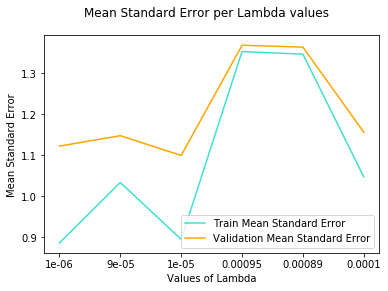

In [33]:
import matplotlib.pyplot as plt 
graph = [0,1,2,3,4,5]

plt.plot(graph, MSE_train, color="turquoise", label='Train Mean Standard Error')
plt.plot(graph, MSE_valid,color="orange", label='Validation Mean Standard Error')
plt.xlabel('Values of Lambda')
plt.legend()
plt.xticks(graph, lamb)
plt.ylabel('Mean Standard Error')
plt.suptitle('Mean Standard Error per Lambda values')
plt.show()

Based on the graph above the best value for lambda is 0.00001, as it gives us the smallest MSE for both the train and validation sets. Since I now have an accurate lambda, I repeat the steps in question 9 to train the entire dataset using that lambda of 0.00001. This is the mistake I made in hmw#3: I did not rerun the predictions with the best lambda. For simplicity I will re-upload the data and start over.

In [ ]:
path = "train_Interactions.csv.gz"
f = gzip.open(path, 'rt', encoding="utf8")
header = f.readline()
header = header.strip().split(',')

In [ ]:
dataset9 = []
for line in f:
    fields = line.strip().split(',')
    d = dict(zip(header, fields))
    d['rating'] = int(d['rating'])
    dataset9.append(d)

In [ ]:
ratingsPerUser = defaultdict(list)
ratingsPerBook = defaultdict(list)

In [ ]:
for d in dataset9:
    user,book = d['userID'], d['bookID']
    ratingsPerUser[user].append(d)
    ratingsPerBook[book].append(d)
    rating = d['rating']

In [ ]:
ratingMean = sum([int(d['rating']) for d in train]) / len(train)

In [ ]:
N = len(dataset9)
nUsers = len(ratingsPerUser)
nItems = len(ratingsPerBook)
users = list(ratingsPerUser.keys())
items = list(ratingsPerBook.keys())

In [ ]:
def prediction(user, item):
    return alpha + userBiases[user] + itemBiases[item]

In [ ]:
alpha = ratingMean
userBiases = defaultdict(float)
itemBiases = defaultdict(float)

In [ ]:
def unpack(theta):
    global alpha
    global userBiases
    global itemBiases
    alpha = theta[0]
    userBiases = dict(zip(users, theta[1:nUsers+1]))
    itemBiases = dict(zip(items, theta[1+nUsers:]))

In [ ]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [ ]:
def cost(theta, labels, lamb):
    unpack(theta)
    predictions = [prediction(d['userID'], d['bookID']) for d in dataset9]
    cost = MSE(predictions, labels)
    print("MSE = " + str(cost))
    for u in userBiases:
        cost += lamb*userBiases[u]**2
    for i in itemBiases:
        cost += lamb*itemBiases[i]**2
    return cost

In [ ]:
def derivative(theta, labels, lamb):
    unpack(theta)
    N = len(dataset9)
    dalpha = 0
    dUserBiases = defaultdict(float)
    dItemBiases = defaultdict(float)
    for d in dataset9:
        u,b = d['userID'], d['bookID']
        pred = prediction(u, b)
        diff = pred - int(d['rating'])
        dalpha += 2/N*diff
        dUserBiases[u] += 2/N*diff
        dItemBiases[b] += 2/N*diff
    for u in userBiases:
        dUserBiases[u] += 2*lamb*userBiases[u]
    for b in itemBiases:
        dItemBiases[b] += 2*lamb*itemBiases[b]
    dtheta = [dalpha] + [dUserBiases[u] for u in users] + [dItemBiases[b] for b in items]
    return numpy.array(dtheta)

In [ ]:
final = 0.00001
y = [int(d['rating']) for d in dataset9]

In [ ]:
final_results = scipy.optimize.fmin_l_bfgs_b(cost, [alpha] + [0.0]*(nUsers+nItems),
                             derivative, args = (y, final))

In [ ]:
predictions = open("predictions_Rating.txt", 'w')
prediction_rating = []

for l in open("pairs_Rating.txt"):
    if l.startswith("userID"):
        predictions.write(l)
        continue
    u,b = l.strip().split('-')
    if u in userBiases and b in itemBiases:
        
        pred = alpha + userBiases[u] + itemBiases[b]
        predictions.write(u + '-' + b + ',' + str(pred) + '\n')
    else:
        pred = int(alpha)
        predictions.write(u + '-' + b + ',' + str(pred) + '\n')
        
    prediction_rating.append(pred)

predictions.close()

new score is 1.138034

In [ ]:
testlast = pd.read_csv('pairs_Rating.txt')

In [ ]:
testlast['prediction'] = v_predict

In [ ]:
len(v_predict)

In [ ]:
export_csv = testlast.to_csv ('predictions_Rating.csv', index = None, header=True)